Luis Javier Jacobo Morimoto | A01571679 \
Alberto Palomino Carvajal   | A01571511 \
Maria Paula Recinos         | A00840131 \
Carlos Cuéllar Solís        | A01571619


In [8]:
import pandas as pd
import csv
import random
import numpy as np
import time
import matplotlib.pyplot as plt

### Movimiento Browniano

In [9]:
class Entrada:
  def __init__(self, n: int, m: int, k: int, pos: np.array):
    assert n > 0, "El número de dimensiones debe ser mayor a 0"
    assert m > 0, "El número de pasos debe ser mayor a 0"
    assert k > 0, "El número de caminatas debe ser mayor a 0"
    self.n = n
    self.m = m
    self.k = k
    self.pos = pos

class Caminatas_aleatorias(Entrada):
  def __init__(self, n: int, m: int, k: int, pos: np.array, df: pd.DataFrame):
    super().__init__(n, m, k, pos)
    self.df = df

  def distancia_euclideana(pos, n):
    sum = 0
    for dimension in range(n):
      sum += pos[dimension] ** 2

    return np.sqrt(sum)

  def caminatas(self):
    n = self.n
    m = self.m
    k = self.k
    pos = self.pos
    df = self.df

    df = pd.DataFrame(columns = ['Caminata', 'Posicion Final', 'Distancia', 'Tiempo'])

    for caminata in range(k):
      pos = np.array([0] * n)
      tiempo_i = time.time()
      for paso in range(m):
        for dimension in range(n):
          if np.random.randint(0, 2) == 1:
            pos[dimension] += 1
          else:
            pos[dimension] -= 1

      tiempo_f = time.time()
      tiempo_ejecucion = tiempo_f - tiempo_i

      df.loc[caminata, 'Caminata'] = caminata
      df.loc[caminata, 'Posicion Final'] = str(pos)
      df.loc[caminata, 'Distancia'] = Caminatas_aleatorias.distancia_euclideana(pos, n)
      df.loc[caminata, 'Tiempo'] = tiempo_ejecucion

    self.df = df
    return df

In [10]:
class Interfaz:
    @staticmethod
    def pedir_datos():
        dimensiones = int(input("Dimensión del sistema de coordenadas: "))
        pasos = int(input("Número de pasos por caminata: "))
        caminatas = int(input("Número de caminatas: "))

        return Entrada(dimensiones, pasos, caminatas, np.array([0] * dimensiones))

    @staticmethod
    def imprimir_df_caminatas(df):
        display(df)

    @staticmethod
    def crear_archivo_csv(df, nombre = "movimiento_browniano.csv"):
      df.to_csv(nombre, index = False)
      print(f"\nArchivo {nombre} creado")

if __name__ == "__main__":
    interfaz = Interfaz()
    particula_ejemplo = interfaz.pedir_datos()

    algoritmo = Caminatas_aleatorias(particula_ejemplo.n, particula_ejemplo.m, particula_ejemplo.k, particula_ejemplo.pos, pd.DataFrame())

    resultado_df = algoritmo.caminatas()

    interfaz.imprimir_df_caminatas(resultado_df)
    interfaz.crear_archivo_csv(resultado_df)

,Caminata,Posicion Final,Distancia,Tiempo
0,0,[-8 4],8.944272,0.000121
1,1,[0 0],0.0,0.000105
2,2,[-2 4],4.472136,0.000102
3,3,[ 4 -4],5.656854,0.000056
4,4,[6 0],6.0,0.000051
5,5,[4 6],7.211103,0.000093
6,6,[ 8 -6],10.0,0.000079
7,7,[-4 2],4.472136,0.000074
8,8,[-4 -2],4.472136,0.00008
9,9,[2 0],2.0,0.000089



Archivo movimiento_browniano.csv creado


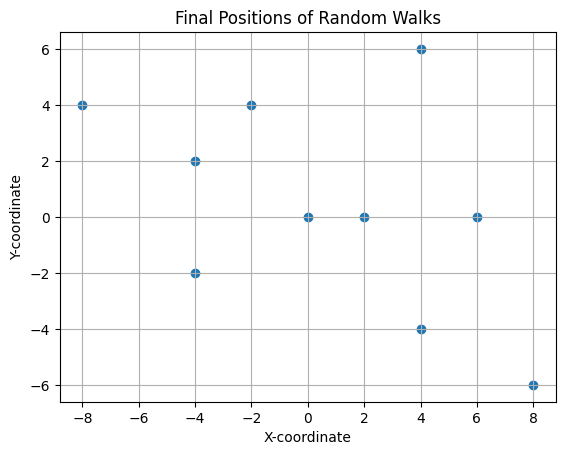

In [12]:
plt.figure()
x_coords = []
y_coords = []

for pos in resultado_df['Posicion Final']:
  parts = pos.strip('[]').split()
  if len(parts) == 2:
    x_coords.append(int(parts[0]))
    y_coords.append(int(parts[1]))

plt.scatter(x_coords, y_coords)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Final Positions of Random Walks')
plt.grid(True)
plt.show()